<a href="https://colab.research.google.com/github/ElpoderdelComputo/Tutoriales_YouTube/blob/main/Train_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrenando un Arbol de desición**
YouTube: El poder del computo

In [148]:
#pip install watermark   
from IPython.display import Image
%matplotlib inline

**Datos de iris**

In [149]:
from sklearn import datasets
import numpy as np
# Cargamos los datos de iris

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print(X[:5])

print('\nClass labels:', np.unique(y))

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

Class labels: [0 1 2]


**Datos de archivo**

In [150]:
# Abre archivo
import pandas as pd
df= pd.read_csv("/content/Train_2021.csv", header=0)

# Mostrar ptimeros 5 registros
df[:5]

,X,Y,R,G,B,ExG,ExR,ExGR,CIVE,VEG,NGRDI,NDI,CLASE
0,26,89,62,76,76,14,10.8,3.2,28.95345,1.145453,0.101449,140.985507,4
1,24,88,66,80,81,13,12.4,0.6,30.39845,1.132214,0.095890,140.273973,4
2,26,87,67,81,81,14,12.8,1.2,30.02845,1.134926,0.094595,140.108108,4
3,27,87,67,82,79,18,11.8,6.2,28.04745,1.158543,0.100671,140.885906,4
4,80,61,70,71,73,-1,27.0,-28.0,34.78145,1.000211,0.007092,128.907801,4


In [151]:
#CLASIFICAR CON LOS VALORES DE X: R,G,B,ExR,NGRDI ; y es la columna 12
X1 = df.iloc[: , [2,3,4,6,10]].values
#X = df.iloc[: , 2:12].values
y1 = df.iloc[: , 12].values

#imprime las clases
print('Etiquetas de clase:', np.unique(y1))

Etiquetas de clase: [1 2 3 4]


In [152]:
# Continua
from sklearn.model_selection import train_test_split

# 70 % del conjunto de datos para entrenamiento y 30 % para validacion
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.4,
                                                    random_state = 1,
                                                    stratify = y)

In [153]:
print('Numero de muestras en y:', np.bincount(y))
print('Numero de muestras en y_train:', np.bincount(y_train))
print('Numero de muestras en y_test:', np.bincount(y_test))

Numero de muestras en y: [50 50 50]
Numero de muestras en y_train: [30 30 30]
Numero de muestras en y_test: [20 20 20]


In [154]:
from sklearn.preprocessing import StandardScaler
# Estandarizar los datos
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [155]:
from sklearn.tree import DecisionTreeClassifier

# Configuración del modelo
arbol = DecisionTreeClassifier(criterion ='gini', 
                                    max_depth = 4, 
                                    random_state = 1)
# Ajuste del modelo
arbol.fit(X_train_std, y_train)

# Precision global de clasificación corecta
print('Train Accuracy : %.5f' % arbol.score(X_train_std, y_train))
print('Test Accuracy : %.5f' % arbol.score(X_test_std, y_test))

Train Accuracy : 0.96667
Test Accuracy : 0.98333


In [156]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # configurar el generador de marcadores y el mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # resaltar ejemplos de prueba
    if test_idx:
        # graficar todos los ejemplos
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

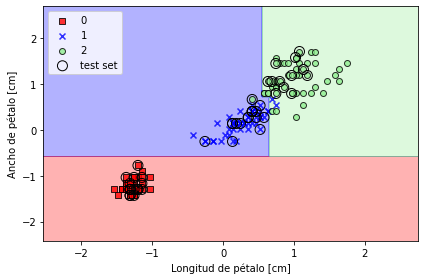

In [157]:
# Graficar Region de desición
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier = arbol,
                      test_idx = range(105, 150))

plt.xlabel('Longitud de pétalo [cm]')
plt.ylabel('Ancho de pétalo [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

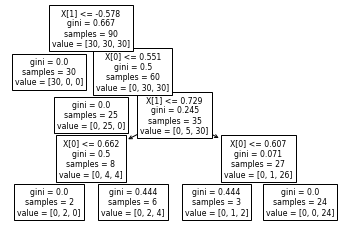

In [158]:
from sklearn import tree

tree.plot_tree(arbol)
#plt.savefig('images/03_21_1.pdf')
plt.show()

In [159]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(arbol,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['Longitud de pétalo', 
                                          'Ancho de Pétalo'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True

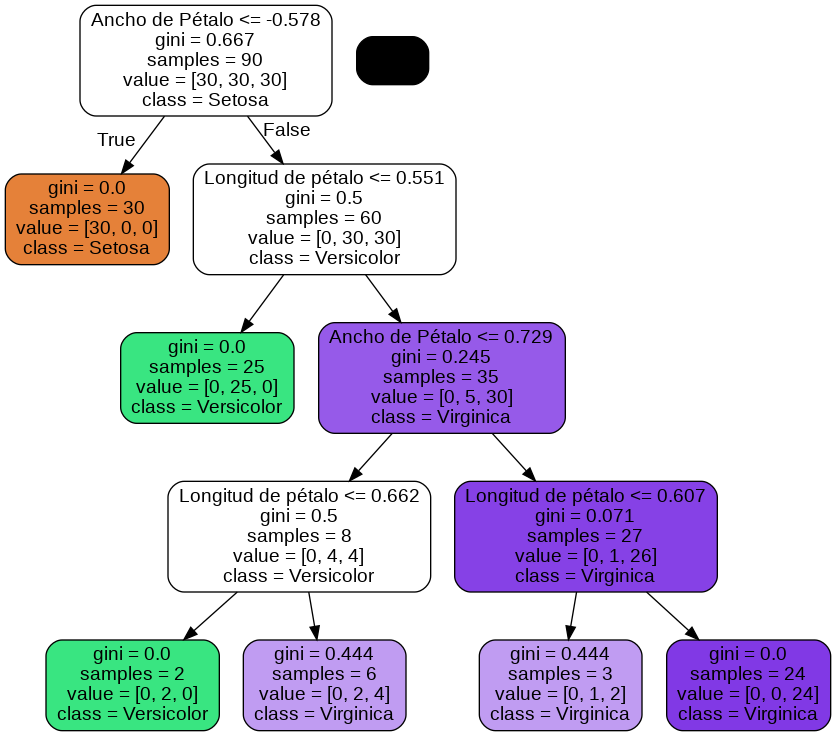

In [160]:
Image(filename='/content/tree.png', width=600) 